In [1]:
import pandas as pd
import polars as pl
import pandasql as ps
from skimpy import skim


In [32]:
item_categories='/Users/arthurgaujoux/Desktop/Farpoint/predict_future_sales/item_categories.csv'
items='/Users/arthurgaujoux/Desktop/Farpoint/predict_future_sales/items.csv'
sales_train='/Users/arthurgaujoux/Desktop/Farpoint/predict_future_sales/sales_train.csv'
shops='/Users/arthurgaujoux/Desktop/Farpoint/predict_future_sales/shops.csv'
test='/Users/arthurgaujoux/Desktop/Farpoint/predict_future_sales/test.csv'


df_item_categories=pd.read_csv(item_categories)

df_items=pd.read_csv(items)

df_sales_train=pd.read_csv(sales_train)
# Convertir les dates en objets datetime et formater en YYYY-MM-DD pour SQLite
df_sales_train['date'] = pd.to_datetime(df_sales_train['date'], format='%d.%m.%Y').dt.strftime('%Y-%m-%d')

df_shops=pd.read_csv(shops)

df_test=pd.read_csv(test)

In [33]:
skim(df_item_categories)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 84     │ │ string      │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column                ┃ NA  ┃ NA %   ┃ mean   ┃ sd      ┃ p0  ┃ p25     ┃ p50   ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ item_category_id      │   0 │      0 │   41.5 │   24.39 │   0 │   20.75 │  41.5 │  62.25 │    83 │ ██████  │  │
│ └───────────────────────┴─────┴────────┴────────┴─────────┴─────┴─────────┴───────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ item_cate │  0 │    0 │ Служебные │ Подарки - │ PC -      │ Элементы  │      22.2 │       3.8 │        321 │  │
│ │ gory_name │    │      │           │ Сумки,    │ Гарнитуры │ питания   │           │           │            │  │
│ │           │    │      │           │ Альбомы,  │ /Наушники │           │           │           │            │  │
│ │           │    │      │           │ Коврики   │           │           │           │           │            │  │
│ │           │    │      │           │ д/мыши    │           │           │           │           │            │  │
│ └───────────┴────┴──────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [34]:
skim(df_items)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 22170  │ │ int64       │ 2     │                                                          │
│ │ Number of columns │ 3      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column               ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25   ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ item_id              │   0 │      0 │   11080 │    6400 │   0 │  5542 │  11080 │  16630 │  22170 │ ██████  │  │
│ │ item_category_id     │   0 │      0 │   46.29 │   15.94 │   0 │    37 │     40 │     58 │     83 │  ▂█▃▄▂  │  │
│ └──────────────────────┴─────┴────────┴─────────┴─────────┴─────┴───────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃          ┃           ┃           ┃           ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest ┃ longest   ┃ min       ┃ max       ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ item_name │  0 │    0 │ 42       │ ABBYY     │ ! ВО      │ Яйцо      │       40.6 │       6.4 │     141022 │  │
│ │           │    │      │          │ Lingvo x6 │ ВЛАСТИ    │ дракона   │            │           │            │  │
│ │           │    │      │          │ Европейск │ НАВАЖДЕНИ │ (Игра     │            │           │            │  │
│ │           │    │      │          │ ая        │ Я         │ престолов │            │           │            │  │
│ │           │    │      │          │ Обновлени │ (ПЛАСТ.)  │ )         │            │           │            │  │
│ │           │    │      │          │ е с       │ D         │           │            │           │            │  │
│ │           │    │      │          │ Домашней  │           │           │            │           │            │  │
│ │           │    │      │          │ до        │           │           │            │           │            │  │
│ │           │    │      │          │ Профессио │           │           │            │           │            │  │
│ │           │    │      │          │ нальной   │           │           │            │           │            │  │
│ │           │    │      │          │ версии    │           │           │            │           │            │  │
│ │           │    │      │          │ (для      │           │           │            │           │            │  │
│ │           │    │      │          │ пользоват │           │           │            │           │            │  │
│ │           │    │      │          │ елей      │           │           │            │           │            │  │
│ │           │    │      │          │ ABBYY     │      

In [35]:
skim(df_sales_train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ Dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 2935849 │ │ int64       │ 3     │                                                         │
│ │ Number of columns │ 6       │ │ float64     │ 2     │                                                         │
│ └───────────────────┴─────────┘ │ string      │ 1     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column             ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p50   ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ date_block_num     │   0 │      0 │   14.57 │   9.423 │    0 │      7 │    14 │     23 │      33 │ █▆▇▅▆▄  │  │
│ │ shop_id            │   0 │      0 │      33 │   16.23 │    0 │     22 │    31 │     47 │      59 │ ▃▄█▅▅█  │  │
│ │ item_id            │   0 │      0 │   10200 │    6324 │    0 │   4476 │  9343 │  15680 │   22170 │ ▇█▅▅▅▅  │  │
│ │ item_price         │   0 │      0 │   890.9 │    1730 │   -1 │    249 │   399 │    999 │  308000 │    █    │  │
│ │ item_cnt_day       │   0 │      0 │   1.243 │   2.619 │  -22 │      1 │     1 │      1 │    2169 │    █    │  │
│ └────────────────────┴─────┴────────┴─────────┴─────────┴──────┴────────┴───────┴────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃        ┃    ┃      ┃            ┃            ┃           ┃            ┃ chars per ┃ words per  ┃ total     ┃  │
│ ┃ column ┃ NA ┃ NA % ┃ shortest   ┃ longest    ┃ min       ┃ max        ┃ row       ┃ row        ┃ words     ┃  │
│ ┡━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ date   │  0 │    0 │ 2013-01-02 │ 2013-01-02 │ 2013-01-0 │ 2015-10-31 │        10 │          1 │   2935849 │  │
│ │        │    │      │            │            │ 1         │            │           │            │           │  │
│ └────────┴────┴──────┴────────────┴────────────┴───────────┴────────────┴───────────┴────────────┴───────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [106]:
print(df_sales_train['item_cnt_day']).value_counts)

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

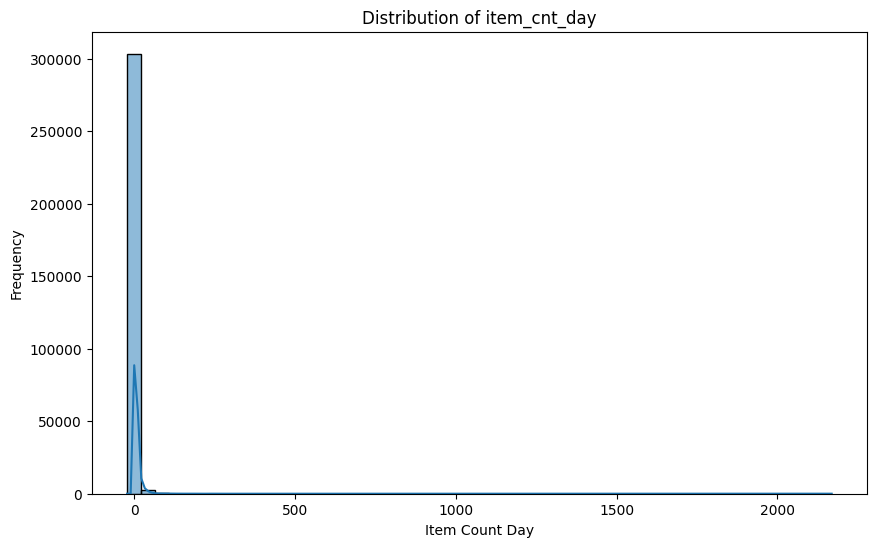

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
df_sales_train=df_sales_train[df_sales_train['item_cnt_day']!=1]
# Assuming df_sales_train is already loaded as shown in your code
# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_sales_train['item_cnt_day'], bins=50, kde=True)
plt.title('Distribution of item_cnt_day')
plt.xlabel('Item Count Day')
plt.ylabel('Frequency')
plt.show()

In [36]:
skim(df_shops)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 60     │ │ string      │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column      ┃ NA   ┃ NA %    ┃ mean    ┃ sd       ┃ p0   ┃ p25      ┃ p50    ┃ p75     ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ shop_id     │    0 │       0 │    29.5 │    17.46 │    0 │    14.75 │   29.5 │   44.25 │     59 │  ██████  │  │
│ └─────────────┴──────┴─────────┴─────────┴──────────┴──────┴──────────┴────────┴─────────┴────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ shop_name │  0 │    0 │ Омск ТЦ   │ РостовНаД │ !Якутск   │ Ярославль │      23.6 │       3.5 │        209 │  │
│ │           │    │      │ "Мега"    │ ону ТРК   │ Орджоники │ ТЦ        │           │           │            │  │
│ │           │    │      │           │ "Мегацент │ дзе, 56   │ "Альтаир" │           │           │            │  │
│ │           │    │      │           │ р         │ фран      │           │           │           │            │  │
│ │           │    │      │           │ Горизонт" │           │           │           │           │            │  │
│ │           │    │      │           │ Островной │           │           │           │           │            │  │
│ └───────────┴────┴──────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [37]:
skim(df_test)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 214200 │ │ int64       │ 3     │                                                          │
│ │ Number of columns │ 3      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column     ┃ NA   ┃ NA %   ┃ mean     ┃ sd      ┃ p0  ┃ p25     ┃ p50      ┃ p75      ┃ p100     ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━┩  │
│ │ ID         │    0 │      0 │   107100 │   61830 │   0 │   53550 │   107100 │   160600 │   214200 │ ██████  │  │
│ │ shop_id    │    0 │      0 │    31.64 │   17.56 │   2 │      16 │     34.5 │       47 │       59 │ ▇▆▆▇██  │  │
│ │ item_id    │    0 │      0 │    11020 │    6253 │  30 │    5382 │    11200 │    16070 │    22170 │ ██▇██▇  │  │
│ └────────────┴──────┴────────┴──────────┴─────────┴─────┴─────────┴──────────┴──────────┴──────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [56]:
# jour ferier russes 2013
# 1er janvier - 8 janvier: nouvel an
# 7 janvier : noel orthodoxe
# 23 fevrier : Défenseurs de la fête de la patrie 
# 8 mars : Journée internationale des femmes
# 1er mai - 3 mai: Fête du printemps et du travail (le Pervomaï)
# 9 mai - 10mai  : Fête de la victoire de la Grande guerre patriotique (1941-1945)
# 12 juin : Jour de la Russie (Fête de la Souveraineté de la fédération de Russie)
# 4 novembre: Fête de l’unité nationale

# jour ferier russes 2014
# 1er janvier - 9 janvier: nouvel an
# 7 janvier : noel orthodoxe
# 23 fevrier : Défenseurs de la fête de la patrie 
# 8 mars : Journée internationale des femmes
# 1er mai : Fête du printemps et du travail (le Pervomaï)
# 9 mai : Fête de la victoire de la Grande guerre patriotique (1941-1945)
# 12 juin : Jour de la Russie (Fête de la Souveraineté de la fédération de Russie)
# 4 novembre: Fête de l’unité nationale

# jour ferier russes 2015
# 1er janvier - 9 janvier: nouvel an
# 7 janvier : noel orthodoxe
# 23 fevrier : Défenseurs de la fête de la patrie 
# 9 mars : Journée internationale des femmes
# 1er mai : Fête du printemps et du travail (le Pervomaï)
# 9 mai : Fête de la victoire de la Grande guerre patriotique (1941-1945)
# 12 juin : Jour de la Russie (Fête de la Souveraineté de la fédération de Russie)
# 4 novembre: Fête de l’unité nationale

holidays_date = ['2013-01-01','2013-01-02','2013-01-03','2013-01-04', '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08', '2013-02-23', '2013-03-08', '2013-05-01', '2013-05-09', '2013-05-10', '2013-06-12', '2013-11-04',
'2014-01-01','2014-01-02','2014-01-03','2014-01-04', '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09', '2014-02-23', '2014-03-08', '2014-05-01', '2014-05-09', '2014-06-12', '2014-11-04',
'2015-01-01','2015-01-02','2015-01-03','2015-01-04', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-02-23', '2015-03-09', '2015-05-01', '2015-05-09', '2015-06-12', '2015-11-04']

In [77]:
query = """
with add_price_date_info_df as (
    select
        date,
        shop_id,
        item_id,
        date_block_num,
        item_price,
        item_cnt_day,
        sum(item_price * item_cnt_day) over (partition by date, shop_id, item_id) as item_shop_date_price,
        sum(item_price * item_cnt_day) over (partition by date, shop_id) as shop_date_price,
        item_cnt_day + abs((select min(item_cnt_day) from df_sales_train)) as rescaling_item_cnt_day,
        case
            when strftime('%w', date)='1' 
            then 1
            else 0
        end as monday_flag,
        case
            when strftime('%w', date)='2'
            then 1
            else 0
        end as tuesday_flag,
        case
            when strftime('%w', date)='3'
            then 1
            else 0
        end as wednesday_flag,
        case
            when strftime('%w', date)='4'
            then 1
            else 0
        end thursday_flag,
        case
            when strftime('%w', date)='5'
            then 1
            else 0
        end as friday_flag,
        case
            when strftime('%w', date)='6'
            then 1
            else 0
        end as saturday_flag,
        case
            when strftime('%w', date)='0'
            then 1
            else 0
        end as sunday_flag,
        case 
            when strftime('%w', date)='6' or strftime('%w', date)='0'
            then 1
            else 0
        end as week_end_flag,
        case
            when strftime('%m', date)='1'
            then 1
            else 0
        end as january_flag,
        case
            when strftime('%m', date)='2'
            then 1
            else 0
        end as february_flag,
        case
            when strftime('%m', date)='3'
            then 1
            else 0
        end as march_flag,
        case
            when strftime('%m', date)='4'
            then 1
            else 0
        end as april_flag,
        case
            when strftime('%m', date)='5'
            then 1
            else 0
        end as may_flag,
        case
            when strftime('%m', date)='6'
            then 1
            else 0
        end as june_flag,
        case
            when strftime('%m', date)='7'
            then 1
            else 0
        end as july_flag,
        case
            when strftime('%m', date)='8'
            then 1
            else 0
        end as august_flag,
        case
            when strftime('%m', date)='9'
            then 1
            else 0
        end as september_flag,
        case
            when strftime('%m', date)='10'
            then 1
            else 0
        end as october_flag,
        case
            when strftime('%m', date)='11'
            then 1
            else 0
        end as november_flag,
        case
            when strftime('%m', date)='12'
            then 1
            else 0
        end as december_flag,
        case
            when date in ('2013-01-01','2013-01-02','2013-01-03','2013-01-04', '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08', '2013-02-23', '2013-03-08', '2013-05-01', '2013-05-09', '2013-05-10', '2013-06-12', '2013-11-04', '2014-01-01','2014-01-02','2014-01-03','2014-01-04', '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09', '2014-02-23', '2014-03-08', '2014-05-01', '2014-05-09', '2014-06-12', '2014-11-04', '2015-01-01','2015-01-02','2015-01-03','2015-01-04', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-02-23', '2015-03-09', '2015-05-01', '2015-05-09', '2015-06-12', '2015-11-04')
            then 1
            else 0
        end holiday_flag
    from df_sales_train

)    
select * from add_price_date_info_df where week_end_flag = 1
"""
df_agg_sales_train = ps.sqldf(query, locals())


print(df_agg_sales_train)

               date  shop_id  item_id  date_block_num  item_price  \
0        2013-01-05        0       98               0       268.0   
1        2013-01-05        0      210               0       118.0   
2        2013-01-05        0      947               0        37.0   
3        2013-01-05        0     1266               0       173.0   
4        2013-01-05        0     1329               0       259.0   
...             ...      ...      ...             ...         ...   
1093458  2015-10-31       59    20730              33       499.0   
1093459  2015-10-31       59    20866              33       699.0   
1093460  2015-10-31       59    20949              33         5.0   
1093461  2015-10-31       59    21369              33       169.0   
1093462  2015-10-31       59    21449              33       449.0   

         item_cnt_day  item_shop_date_price  shop_date_price  \
0                 1.0                 268.0         167500.0   
1                 1.0                 118.0

In [78]:
print(df_agg_sales_train.columns)
print(df_agg_sales_train.dtypes)

Index(['date', 'shop_id', 'item_id', 'date_block_num', 'item_price',
       'item_cnt_day', 'item_shop_date_price', 'shop_date_price',
       'rescaling_item_cnt_day', 'monday_flag', 'tuesday_flag',
       'wednesday_flag', 'thursday_flag', 'friday_flag', 'saturday_flag',
       'sunday_flag', 'week_end_flag', 'january_flag', 'february_flag',
       'march_flag', 'april_flag', 'may_flag', 'june_flag', 'july_flag',
       'august_flag', 'september_flag', 'october_flag', 'november_flag',
       'december_flag', 'holiday_flag'],
      dtype='object')
date                       object
shop_id                     int64
item_id                     int64
date_block_num              int64
item_price                float64
item_cnt_day              float64
item_shop_date_price      float64
shop_date_price           float64
rescaling_item_cnt_day    float64
monday_flag                 int64
tuesday_flag                int64
wednesday_flag              int64
thursday_flag               int64
frid

In [85]:
# type changing
query = """ 
select
    cast(date as text) as date,
    cast(shop_id as text) as shop_id,
    cast(item_id as text) as item_id,
    cast(rescaling_item_cnt_day as integer) as rescaling_item_cnt_day,
    cast(monday_flag as text) as monday_flag,
    cast(tuesday_flag as text) as tuesday_flag,
    cast(wednesday_flag as text) as wednesday_flag,
    cast(thursday_flag as text) as thursday_flag,
    cast(friday_flag as text) as friday_flag, 
    cast(saturday_flag as text) as saturday_flag, 
    cast(sunday_flag as text) as sunday_flag, 
    cast(week_end_flag as text) as week_end_flag, 
    cast(january_flag as text) as january_flag, 
    cast(february_flag as text) as february_flag, 
    cast(march_flag as text) as march_flag, 
    cast(april_flag as text) as april_flag, 
    cast(may_flag as text) as may_flag, 
    cast(june_flag as text) as june_flag, 
    cast(july_flag as text) as july_flag, 
    cast(august_flag as text) as august_flag, 
    cast(september_flag as text) as september_flag,
    cast(october_flag as text) as october_flag,
    cast(november_flag as text) as november_flag,
    cast(december_flag as text) as december_flag,
    cast(holiday_flag as text) as holiday_flag
from df_agg_sales_train
"""
final_df = ps.sqldf(query, locals())


In [98]:
query = """ 
select
    date,
    shop_id,
    item_id,
    max(rescaling_item_cnt_day) as max_item_cnt_day,
    avg(rescaling_item_cnt_day)
from df_agg_sales_train
 
"""
final_df = ps.sqldf(query, locals())
print(final_df)

         date  shop_id  item_id  max_item_cnt_day  avg(rescaling_item_cnt_day)
0  2014-06-28       25    20949             523.0                    23.229069


In [92]:
final_df['date'] = final_df['date'].astype('string')
final_df['shop_id'] = final_df['shop_id'].astype('string')
final_df['item_id'] = final_df['item_id'].astype('string')
final_df['rescaling_item_cnt_day'] = final_df['rescaling_item_cnt_day'].astype('int')
final_df['monday_flag'] = final_df['monday_flag'].astype('string')
final_df['tuesday_flag'] = final_df['tuesday_flag'].astype('string')
final_df['wednesday_flag'] = final_df['wednesday_flag'].astype('string')
final_df['thursday_flag'] = final_df['thursday_flag'].astype('string')
final_df['friday_flag'] = final_df['friday_flag'].astype('string')
final_df['saturday_flag'] = final_df['saturday_flag'].astype('string')
final_df['sunday_flag'] = final_df['sunday_flag'].astype('string')
final_df['week_end_flag'] = final_df['week_end_flag'].astype('string')
final_df['january_flag'] = final_df['january_flag'].astype('string')
final_df['february_flag'] = final_df['february_flag'].astype('string')
final_df['march_flag'] = final_df['march_flag'].astype('string')
final_df['april_flag'] = final_df['april_flag'].astype('string')
final_df['may_flag'] = final_df['may_flag'].astype('string')
final_df['june_flag'] = final_df['june_flag'].astype('string')
final_df['july_flag'] = final_df['july_flag'].astype('string')
final_df['august_flag'] = final_df['august_flag'].astype('string')
final_df['september_flag'] = final_df['september_flag'].astype('string')
final_df['october_flag'] = final_df['october_flag'].astype('string')
final_df['november_flag'] = final_df['november_flag'].astype('string')
final_df['december_flag'] = final_df['december_flag'].astype('string')
final_df['holiday_flag'] = final_df['holiday_flag'].astype('string')


In [93]:
print(final_df.dtypes)

date                      string[python]
shop_id                   string[python]
item_id                   string[python]
rescaling_item_cnt_day             int64
monday_flag               string[python]
tuesday_flag              string[python]
wednesday_flag            string[python]
thursday_flag             string[python]
friday_flag               string[python]
saturday_flag             string[python]
sunday_flag               string[python]
week_end_flag             string[python]
january_flag              string[python]
february_flag             string[python]
march_flag                string[python]
april_flag                string[python]
may_flag                  string[python]
june_flag                 string[python]
july_flag                 string[python]
august_flag               string[python]
september_flag            string[python]
october_flag              string[python]
november_flag             string[python]
december_flag             string[python]
holiday_flag    

In [94]:
final_df.to_csv(
    '/Users/arthurgaujoux/Desktop/Farpoint/predict_future_sales/df_agg_sales_train.csv',
    index=False
    )